# Day24 Airbnb in Berlin 5/5 the ring zone summary 
# 柏林Airbnb 5/5 蛋黃區房源分析小結
今天針對前幾日視覺化的結果，來篩選一些符合我需求的房源。<br>
Today we will filter out some listings that fit my need based on the visualizations we did in the past few days.


In [1]:
# 載入所需套件 import the packages we need
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py 

import warnings # 忽略警告訊息 
warnings.filterwarnings("ignore") 

# 讀入檔案來分析 
Read in the file

In [2]:
drop = pd.read_csv('drop.csv') # 讀入昨天存的檔案來分析 read in the file we created yesterday
print('There are', drop.id.nunique(), 'listings in the drop data.')
drop.info() # 查看資料細節 the info of data
drop.head(3) # 叫出前三筆資料看看 print out the top three rows of data

There are 7203 listings in the drop data.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7203 entries, 0 to 7202
Data columns (total 28 columns):
Unnamed: 0                      7203 non-null int64
id                              7203 non-null int64
name                            7182 non-null object
summary                         6902 non-null object
space                           4702 non-null object
description                     7127 non-null object
host_id                         7203 non-null int64
host_name                       7191 non-null object
host_location                   7158 non-null object
host_about                      3733 non-null object
host_is_superhost               7191 non-null object
neighbourhood_group_cleansed    7203 non-null object
city                            7203 non-null object
state                           7184 non-null object
zipcode                         7203 non-null int64
market                          7187 non-null object
latitud

,Unnamed: 0,id,name,summary,space,description,host_id,host_name,host_location,host_about,...,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price
0,0,2015,Berlin-Mitte Value! Quiet courtyard/very central,Great location! 30 of 75 sq meters. This wood...,A+++ location! This „Einliegerwohnung“ is an e...,Great location! 30 of 75 sq meters. This wood...,2217,Jan,"Key Biscayne, Florida, United States",Believe in sharing economy.,...,Guesthouse,Entire home/apt,3,1.0,1.0,2.0,Real Bed,"{TV,""Cable TV"",Wifi,Kitchen,Gym,Heating,""Famil...",NaN,60.0
1,1,3309,BerlinSpot Schöneberg near KaDeWe,First of all: I prefer short-notice bookings. ...,"Your room is really big and has 26 sqm, is ver...",First of all: I prefer short-notice bookings. ...,4108,Jana,"Berlin, Berlin, Germany",ENJOY EVERY DAY AS IF IT'S YOUR LAST!!! \r\n\r...,...,Apartment,Private room,1,1.0,1.0,1.0,Pull-out Sofa,"{Internet,Wifi,""Pets live on this property"",Ca...",0.0,28.0
2,2,16644,In the Heart of Berlin - Kreuzberg,Light and sunny 2-Room-turn of the century-fla...,Rent in the heart of Berlin - Kreuzberg Newly ...,Light and sunny 2-Room-turn of the century-fla...,64696,Rene,"Santa Cruz, California, United States",Friendly and social. Likes to travel and enjoy...,...,Apartment,Entire home/apt,5,1.0,1.0,3.0,Real Bed,"{TV,Wifi,Kitchen,""Buzzer/wireless intercom"",He...",0.0,90.0


## 個人想要只有一張床的房源，而且要真的床
I only need one bed. And I prefer real bed.

In [3]:
drop_beds = drop.loc[(drop.beds<2)&(drop.beds>0)]
drop_beds.head(3)

,Unnamed: 0,id,name,summary,space,description,host_id,host_name,host_location,host_about,...,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price
1,1,3309,BerlinSpot Schöneberg near KaDeWe,First of all: I prefer short-notice bookings. ...,"Your room is really big and has 26 sqm, is ver...",First of all: I prefer short-notice bookings. ...,4108,Jana,"Berlin, Berlin, Germany",ENJOY EVERY DAY AS IF IT'S YOUR LAST!!! \r\n\r...,...,Apartment,Private room,1,1.0,1.0,1.0,Pull-out Sofa,"{Internet,Wifi,""Pets live on this property"",Ca...",0.0,28.0
3,3,17904,Beautiful Kreuzberg studio/WiFi (reg. pend.),NaN,- beautiful studio apt in downtown Berlin - br...,- beautiful studio apt in downtown Berlin - br...,68997,Matthias,"Rio de Janeiro, Rio de Janeiro, Brazil",I am a journalist/writer. Lived for 15 years...,...,Apartment,Entire home/apt,2,1.0,NaN,1.0,Real Bed,"{TV,Wifi,Kitchen,""Free street parking"",""Buzzer...",NaN,49.0
8,8,35152,Private Room w/ own bath in Design Mitte Loft,You are looking at a wonderful private room wi...,You are about to rent a private room in a shar...,You are looking at a wonderful private room wi...,151248,Flo,"Berlin, Berlin, Germany",I love the freedom that our world offers and h...,...,Loft,Private room,2,1.0,1.0,1.0,Real Bed,"{TV,Wifi,Kitchen,""Paid parking off premises"",E...",0.0,50.0


In [4]:
real_bed = drop_beds["bed_type"] == 'Real Bed'
one_real_bed = drop_beds[real_bed]
one_real_bed.head(3)

,Unnamed: 0,id,name,summary,space,description,host_id,host_name,host_location,host_about,...,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price
3,3,17904,Beautiful Kreuzberg studio/WiFi (reg. pend.),NaN,- beautiful studio apt in downtown Berlin - br...,- beautiful studio apt in downtown Berlin - br...,68997,Matthias,"Rio de Janeiro, Rio de Janeiro, Brazil",I am a journalist/writer. Lived for 15 years...,...,Apartment,Entire home/apt,2,1.0,NaN,1.0,Real Bed,"{TV,Wifi,Kitchen,""Free street parking"",""Buzzer...",NaN,49.0
8,8,35152,Private Room w/ own bath in Design Mitte Loft,You are looking at a wonderful private room wi...,You are about to rent a private room in a shar...,You are looking at a wonderful private room wi...,151248,Flo,"Berlin, Berlin, Germany",I love the freedom that our world offers and h...,...,Loft,Private room,2,1.0,1.0,1.0,Real Bed,"{TV,Wifi,Kitchen,""Paid parking off premises"",E...",0.0,50.0
9,9,37004,WONDERFUL ROOM for longer stays Berlin Central,Great apartment in the style of a typical late...,"You get up by stairs, second floor (no elevato...",Great apartment in the style of a typical late...,159734,Bernd,"Berlin, Berlin, Germany",Its more than 15 years now that I moved to Ber...,...,Apartment,Private room,1,1.0,1.0,1.0,Real Bed,"{""Cable TV"",Wifi,Kitchen,""Smoking allowed"",""Pe...",646.0,30.0


## 想要有浴室、並且房東是認證的超級房東
Bathroom needed, and I want a super host.

In [5]:
one_bathroom_super = one_real_bed.loc[(one_real_bed.bathrooms>=1)&(one_real_bed.host_is_superhost=='t')]
one_bathroom_super.head(3)

,Unnamed: 0,id,name,summary,space,description,host_id,host_name,host_location,host_about,...,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price
3,3,17904,Beautiful Kreuzberg studio/WiFi (reg. pend.),NaN,- beautiful studio apt in downtown Berlin - br...,- beautiful studio apt in downtown Berlin - br...,68997,Matthias,"Rio de Janeiro, Rio de Janeiro, Brazil",I am a journalist/writer. Lived for 15 years...,...,Apartment,Entire home/apt,2,1.0,NaN,1.0,Real Bed,"{TV,Wifi,Kitchen,""Free street parking"",""Buzzer...",NaN,49.0
32,33,127708,Design Jewel in the midst of MITTE!,Welcome to my nice little apartment I am renti...,"Hackescher Markt: The ""place to be"" in Berlin!...",Welcome to my nice little apartment I am renti...,632174,Stéphanie,"Berlin, Berlin, Germany","Hello! I'm french, 40 years old and live in Be...",...,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Pets all...",NaN,89.0
52,55,181160,KINOMUSEUM,Exceptional guestroom in the back of the Berli...,NaN,Exceptional guestroom in the back of the Berli...,868282,Frank,"Berlin, Berlin, Germany","Filmvorführer, Entertainer, Salonkommunist\n(C...",...,Boutique hotel,Private room,1,1.0,1.0,1.0,Real Bed,"{Wifi,""Pets allowed"",Heating,""Fire extinguishe...",0.0,54.0


## 只要房子跟公寓類型的房源
Only house and apartment.

In [6]:
house_apartment = one_bathroom_super.loc[(one_bathroom_super.property_type=='Apartment') | (one_bathroom_super.property_type=='House')]
house_apartment.head(3)

,Unnamed: 0,id,name,summary,space,description,host_id,host_name,host_location,host_about,...,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price
3,3,17904,Beautiful Kreuzberg studio/WiFi (reg. pend.),NaN,- beautiful studio apt in downtown Berlin - br...,- beautiful studio apt in downtown Berlin - br...,68997,Matthias,"Rio de Janeiro, Rio de Janeiro, Brazil",I am a journalist/writer. Lived for 15 years...,...,Apartment,Entire home/apt,2,1.0,NaN,1.0,Real Bed,"{TV,Wifi,Kitchen,""Free street parking"",""Buzzer...",NaN,49.0
32,33,127708,Design Jewel in the midst of MITTE!,Welcome to my nice little apartment I am renti...,"Hackescher Markt: The ""place to be"" in Berlin!...",Welcome to my nice little apartment I am renti...,632174,Stéphanie,"Berlin, Berlin, Germany","Hello! I'm french, 40 years old and live in Be...",...,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Pets all...",NaN,89.0
63,66,196285,Studio-apt Kreuzberg: central/cozy,NaN,This apartment is 38 square meter big and it h...,This apartment is 38 square meter big and it h...,955509,Karsten,"Berlin, Berlin, Germany","We like design, architecture and furnitures an...",...,Apartment,Entire home/apt,2,1.0,0.0,1.0,Real Bed,"{Internet,Wifi,Kitchen,""Buzzer/wireless interc...",NaN,50.0


## 來看看符合條件的房源在不同郵遞區號地點的價格
Plot out the price of listings that meet our needs with different zipcodes.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 <a list of 26 Text xticklabel objects>)

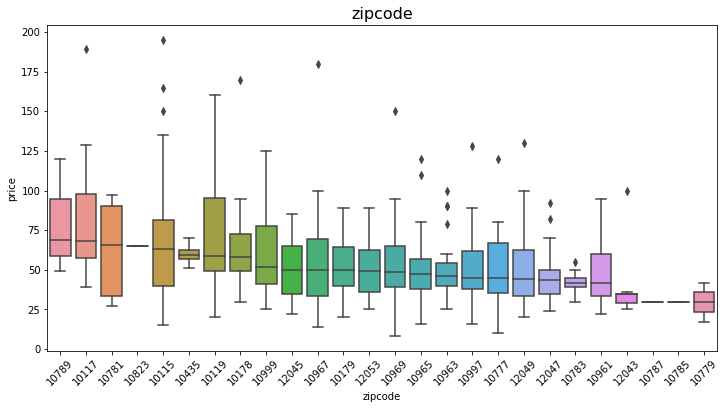

In [7]:
sort_price = house_apartment.groupby('zipcode')['price'].median().sort_values(ascending=False).index

plt.figure(figsize=(12,6))
plt.title('zipcode', fontsize=16)
sns.boxplot(y='price', x='zipcode', data=house_apartment, order=sort_price)
plt.xticks(rotation=45)


## 保留價位介於25到100元的房源存成csv檔
Save listing price range from 25 to 100 as a new csv file.

In [8]:
cleaned = house_apartment.loc[(house_apartment.price>=25) & (house_apartment.price<=100)]
cleaned = cleaned.iloc[:, 1:]
cleaned.reset_index(drop=True)
cleaned.head(3)

,id,name,summary,space,description,host_id,host_name,host_location,host_about,host_is_superhost,...,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price
3,17904,Beautiful Kreuzberg studio/WiFi (reg. pend.),NaN,- beautiful studio apt in downtown Berlin - br...,- beautiful studio apt in downtown Berlin - br...,68997,Matthias,"Rio de Janeiro, Rio de Janeiro, Brazil",I am a journalist/writer. Lived for 15 years...,t,...,Apartment,Entire home/apt,2,1.0,NaN,1.0,Real Bed,"{TV,Wifi,Kitchen,""Free street parking"",""Buzzer...",NaN,49.0
32,127708,Design Jewel in the midst of MITTE!,Welcome to my nice little apartment I am renti...,"Hackescher Markt: The ""place to be"" in Berlin!...",Welcome to my nice little apartment I am renti...,632174,Stéphanie,"Berlin, Berlin, Germany","Hello! I'm french, 40 years old and live in Be...",t,...,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Pets all...",NaN,89.0
63,196285,Studio-apt Kreuzberg: central/cozy,NaN,This apartment is 38 square meter big and it h...,This apartment is 38 square meter big and it h...,955509,Karsten,"Berlin, Berlin, Germany","We like design, architecture and furnitures an...",t,...,Apartment,Entire home/apt,2,1.0,0.0,1.0,Real Bed,"{Internet,Wifi,Kitchen,""Buzzer/wireless interc...",NaN,50.0


In [9]:
cleaned.to_csv('cleaned.csv')


文中若有錯誤還望不吝指正，感激不盡。
Please let me know if there’s any mistake in this article. Thanks for reading.

Reference 參考資料：

[1] [Inside Airbnb](http://insideairbnb.com/get-the-data.html)

[2] [利用Airbnb來更了解居住城市，以臺北為例 Python實作（上）](https://medium.com/finformation%E7%95%B6%E7%A8%8B%E5%BC%8F%E9%81%87%E4%B8%8A%E8%B2%A1%E5%8B%99%E9%87%91%E8%9E%8D/%E5%88%A9%E7%94%A8airbnb%E4%BE%86%E6%9B%B4%E4%BA%86%E8%A7%A3%E5%B1%85%E4%BD%8F%E5%9F%8E%E5%B8%82-%E4%BB%A5%E8%87%BA%E5%8C%97%E7%82%BA%E4%BE%8B-python%E5%AF%A6%E4%BD%9C-3f4903e8742)

[3] [Airbnb listings in Berlin](https://github.com/tgnco1218/Data-Cleaning-and-Scraping-30Days/blob/master/Day19_Airbnb_in_Berlin/Berlin_airbnb.ipynb)
